In [7]:
import numpy as np
import workpy
import subpy
import axyppy
from netCDF4 import Dataset
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
# Load and reshape gridded data
icedata = Dataset('ETOPO1_Ice_c_gdal.grd')
beddata = Dataset('ETOPO1_Bed_c_gdal.grd')
icegrid = np.flipud(icedata['z'][:].reshape(10800,21600).T)
bedgrid = np.flipud(beddata['z'][:].reshape(10800,21600).T)
print(icegrid.shape)
print(icedata)

(21600, 10800)
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: ETOPO1_Ice_c_gmt4.grd
    source: grdreformat -V ETOPO1_Ice_c_gmt4.grd ETOPO1_Ice_c_gdal.grd=ci
    dimensions(sizes): side(2), xysize(233280000)
    variables(dimensions): float64 x_range(side), float64 y_range(side), float64 z_range(side), float64 spacing(side), int32 dimension(side), int32 z(xysize)
    groups: 



In [3]:
# Calculate axyp and dxyp
imE1 = 21600
jmE1 = 10800
im1q = 288
jm1 = 180
axyp = axyppy.axyp_latlon_calc(int(im1q),int(jm1),0)
dxyp = subpy.dxyp_calc(imE1,jmE1,0)

In [4]:
# Reduce resolution from 1min to 2.5x2
arrays = workpy.work(np.fliplr(icegrid),np.fliplr(bedgrid),axyp[0],dxyp)

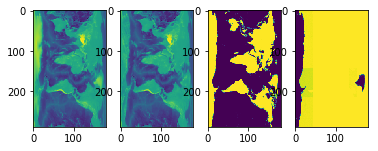

In [5]:
# Plot topo, bed, land, ice
fig, axes = plt.subplots(ncols=4)
for i,ax in enumerate(axes.flatten()):
    ax.imshow(arrays[i])